# Pandas4 : 병합과 연결
판다스 데이터를 다루다 보면 다양한 데이터셋를 만나게 된다. 하나의 엑셀 파일처럼 단일 데이터를 다루는 경우는 거의 없고, 많게는 수십 개의 파일들을 다루면서 필요한 경우 데이터를 합치는 작업도 많이 한다.  
현실에서는 다양한 데이터베이스에서 쏟아지는 데이터를 필요에 맞게 수정해 처리하는 경우가 대부분이다. 대표적으로 **SQL**이 데이터베이스를 다루기 위한 데이터 도구로 사용되는데, 판다스도 이와 거의 동일한 기능을 제공하여 사용자가 편하기 데이터를 다룰 수 있도록 돕는다.

In [40]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

---

### 1.병합
첫 번째 방법은 병합이다. 병합(merge)은 기본적으로 '두 개의 데이터를 특정한 기준을 가지고 하나로 통합하는 작업'이다. 병합의 또 다른 이름은 **조인(join)** 이다. 일반적으로 SQL에서는 조인이라는 표현을 더 많이 사용한다.  
조인은 다음과 같이 4가지로 나눌 수 있다.  

| Join | 설명 |
| ---- | ----|
| **내부 조인(Inner join)** | 두 개의 테이블을 병합할 때 두 테이블을 병합하는 key 값을 기준으로 두 테이블에 모두 존재하는 key 값의 행끼리 병합 |
| **완전 조인(Full join)**  | 두 개의 테이블에서 각각의 행 병합. 두 테이블에서 동일한 key 값을 가진 행은 통합하고, 두 테이블 중 하나라도 키 값이 존재하지 않는다면 존재하는 쪽의 데이터만 남김 |
| **왼쪽 조인(Left join)**  | 두 개의 테이블에서 각각의 행을 병합할 때, 왼쪽 테이블의 값을 기준으로 같은 key 값을 소유하고 있는 행을 병합하고, 오른쪽 테이블에 해당 key 값이 존재하지 않는다면 해당 행 삭제 |
| **오른쪽 조인(Right join)**| 두 개의 테이블에서 각각의 행을 병합할 때, 오른쪽 테이블의 값을 기준으로 같은 key 값을 소유하고 있는 행을 병합하고, 왼쪽 테이블에 해당 key 값이 존재하지 않는다면 해당 행 삭제

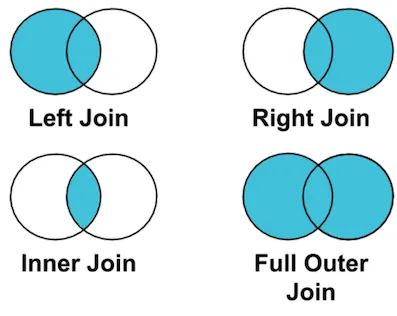

In [17]:
raw_data1 = {'subject_id':['1','2','3','4','5','7','8','9','10','11'],
             'test_score':[51,15,15,61,16,14,15,1,61,16]}

df_left=pd.DataFrame(raw_data1,columns=['subject_id','test_score'])

In [18]:
raw_data2 = {'subject_id':['4','5','6','7','8'],
             'first_name':['Billy','Brian','Bran','Bryce','Betty'],
             'last_name':['Bonder','Black','Balwner','Brice','Btisan']}

df_right=pd.DataFrame(raw_data2,columns=['subject_id','first_name','last_name'])

#### 1-1. 내부 조인

두 테이블에서 subject_id를 기준으로 내부 조인을 실행한다. 내부 조인을 수행하면 key 값이 되는 subject_id 열의 값이 두 테이블에 모두 존재해야만 병합되어 하나의 테이블로 나타낼 수 있다.

In [19]:
pd.merge(left=df_left,right=df_right,how='inner',on='subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


subject_id의 값이 1,2,3,9,10,11 인 행은 df_left에만 존재하고, subject_id가 6인 경우는 df_right에만 존재한다. 그러므로 해당 값들은 내부 조인을 실행하면 버려진다.

때에 따라서는 왼쪽 테이블과 오른쪽 테이블의 key 값이 다를 수 있는데 그때에는 다음과 같이 left_on과 right_on 매개변수를 사용하여 각각의 테이블에 대한 키 값을 입력한다.

In [20]:
pd.merge(left=df_left,right=df_right,
         left_on='subject_id',right_on='subject_id')

,subject_id,test_score,first_name,last_name
0,4,61,Billy,Bonder
1,5,16,Brian,Black
2,7,14,Bryce,Brice
3,8,15,Betty,Btisan


#### 1-2. 왼쪽,오른쪽 조인
왼쪽 조인은 왼쪽 테이블을 기준으로 데이터를 병합한다. 오른쪽 테이블에 왼쪽에 있는 key 값이 존재하지 않는다면 NaN값으로 출력된다.  
오른쪽 조인은 오른쪽 테이블을 기준으로 데이터를 병합하며 마찬가지로 왼쪽 테이블에 오른쪽에 있는 key 값이 존재하지 않는다면 NaN값으로 출력된다.

In [21]:
##left join : subject_id가 df_left에만 있는 데이터는 NaN 
pd.merge(df_left,df_right,on='subject_id',how='left')

,subject_id,test_score,first_name,last_name
0,1,51,NaN,NaN
1,2,15,NaN,NaN
2,3,15,NaN,NaN
3,4,61,Billy,Bonder
4,5,16,Brian,Black
5,7,14,Bryce,Brice
6,8,15,Betty,Btisan
7,9,1,NaN,NaN
8,10,61,NaN,NaN
9,11,16,NaN,NaN


In [22]:
##right join : subject_id가 df_right에만 있는 데이터는 NaN
pd.merge(df_left,df_right,on='subject_id',how='right')


,subject_id,test_score,first_name,last_name
0,4,61.0,Billy,Bonder
1,5,16.0,Brian,Black
2,6,NaN,Bran,Balwner
3,7,14.0,Bryce,Brice
4,8,15.0,Betty,Btisan


#### 1-3.완전 조인
완전 조인은 두 테이블의 합집합을 의미한다. 완전 조인은 양쪽에 모두 같은 key 값이 있는 데이터가 있을 경우 합치고, 그렇지 않은 경우 NaN으로 처리한다. how 매개변수에 outer를 넣는다.

In [23]:
pd.merge(df_left,df_right,on='subject_id',how='outer')

,subject_id,test_score,first_name,last_name
0,1,51.0,NaN,NaN
1,2,15.0,NaN,NaN
2,3,15.0,NaN,NaN
3,4,61.0,Billy,Bonder
4,5,16.0,Brian,Black
5,7,14.0,Bryce,Brice
6,8,15.0,Betty,Btisan
7,9,1.0,NaN,NaN
8,10,61.0,NaN,NaN
9,11,16.0,NaN,NaN


#### 1-4. 인덱스에 의한 병합
인덱스 값을 키 값으로 하여 두 테이블을 병합할 수 있다. 이 경우에는 이미 인덱스가 의미가 있는 열로 지정되어 있거나, 두 데이터가 모두 순서대로 들어가 있는 경우에 사용이 가능하다. 데이터 특징에 따라 적절히 사용할 수 있어야 한다. 인덱스 값을 기본으로 병합하기 위해서는 다음 코드와 같이 right_index나 left_index를 사용한다.

In [24]:
df_left.index = df_left.subject_id
del df_left['subject_id']

df_right.index = df_right.subject_id
del df_right['subject_id']

pd.merge(df_left,df_right,on='subject_id',how='inner')

,test_score,first_name,last_name
subject_id,,,
4,61,Billy,Bonder
5,16,Brian,Black
7,14,Bryce,Brice
8,15,Betty,Btisan


---

### 2.연결
연결(concatenate)은 병합과 달리 두 테이블을 그대로 붙이는 방법으로, concat 이라고도 표현한다. 흔히 데이터의 스키마가 동일한 데이터끼리 그대로 연결해서 사용하는 경우 연결을 사용한다.  
연결은 흔히 세로로 데이터를 연결하는 경우와 가로로 데이터를 연결하는 경우가 있는데, 일반적으로 우리가 많이 사용하는 경우는 데이터를 세로로 붙이는 경우이다.

연결함수는 크게 **concat**과 **append**가 있다.  
| 함수 | 설명 |
|-----|-----|
|**concat**|두 개의 서로 다른 테이블을 하나의 테이블로 합치는 방식|
|**append**|기존 하나의 테이블에 다른 테이블을 붙이는 방식|

In [34]:
##실습 파일 : 모두 동일한 스키마를 가진 데이터셋
url1 = 'https://raw.githubusercontent.com/harryyang1982/python_ml_workbook/main/datasets/ch04/sales-feb-2014.xlsx'
url2 = 'https://raw.githubusercontent.com/harryyang1982/python_ml_workbook/main/datasets/ch04/sales-jan-2014.xlsx'
url3 = 'https://raw.githubusercontent.com/harryyang1982/python_ml_workbook/main/datasets/ch04/sales-mar-2014.xlsx'

df1 = pd.read_excel(url1, engine='openpyxl')
df2 = pd.read_excel(url2, engine='openpyxl')
df3 = pd.read_excel(url3, engine='openpyxl')

df_list=[df1,df2,df3]

In [38]:
df_concat=pd.concat(df_list,axis=0)
print(len(df))
df.reset_index(drop=True)

384


,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20
...,...,...,...,...,...,...,...
379,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
380,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
381,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
382,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22


In [ ]:
##append -> concat과 결과는 동일하다.
df_append=df1.append(df2)
df_append=df.append(df3)
df

,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20
...,...,...,...,...,...,...,...
137,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
138,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
139,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
140,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22
